<a href="https://colab.research.google.com/github/Shahwar-shk/Tata-Steel-Machine-Failure/blob/main/EDA_Tata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files


uploaded = files.upload()

Saving train.csv to train.csv


In [2]:
from google.colab import files


uploaded = files.upload()

Saving test.csv to test.csv


In [3]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder


In [4]:
# Load the train and test datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Explore the first few rows of the train dataset
print("Train Dataset - First few rows:")
print(train_data.head())

# Explore the first few rows of the test dataset
print("Test Dataset - First few rows:")
print(test_data.head())

# Check for missing values in the train dataset
print("Missing values in train dataset:")
print(train_data.isnull().sum())

# Check for missing values in the test dataset
print("Missing values in test dataset:")
print(test_data.isnull().sum())

# Summary statistics for the train dataset
print("Train Dataset - Summary Statistics:")
print(train_data.describe())

# Summary statistics for the test dataset
print("Test Dataset - Summary Statistics:")
print(test_data.describe())


Train Dataset - First few rows:
   id Product ID Type  Air temperature [K]  Process temperature [K]  \
0   0     L50096    L                300.6                    309.6   
1   1     M20343    M                302.6                    312.1   
2   2     L49454    L                299.3                    308.5   
3   3     L53355    L                301.0                    310.9   
4   4     M24050    M                298.0                    309.0   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1596         36.1              140                0    0   
1                    1759         29.1              200                0    0   
2                    1805         26.5               25                0    0   
3                    1524         44.3              197                0    0   
4                    1641         35.4               34                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0

<ipython-input-5-915098b2a57e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Machine failure", data=train_data, palette="coolwarm")


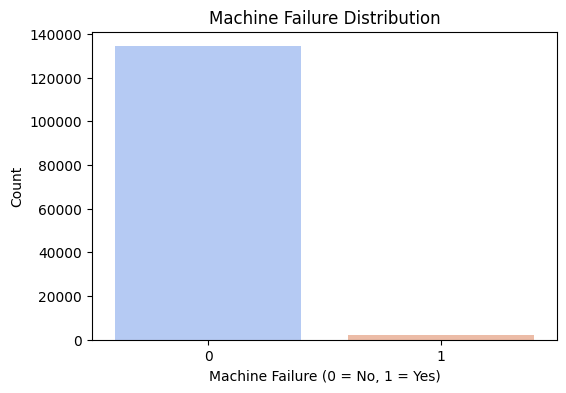

In [5]:
plt.figure(figsize=(6, 4))
data = train_data
sns.countplot(x="Machine failure", data=train_data, palette="coolwarm")
plt.title("Machine Failure Distribution")
plt.xlabel("Machine Failure (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

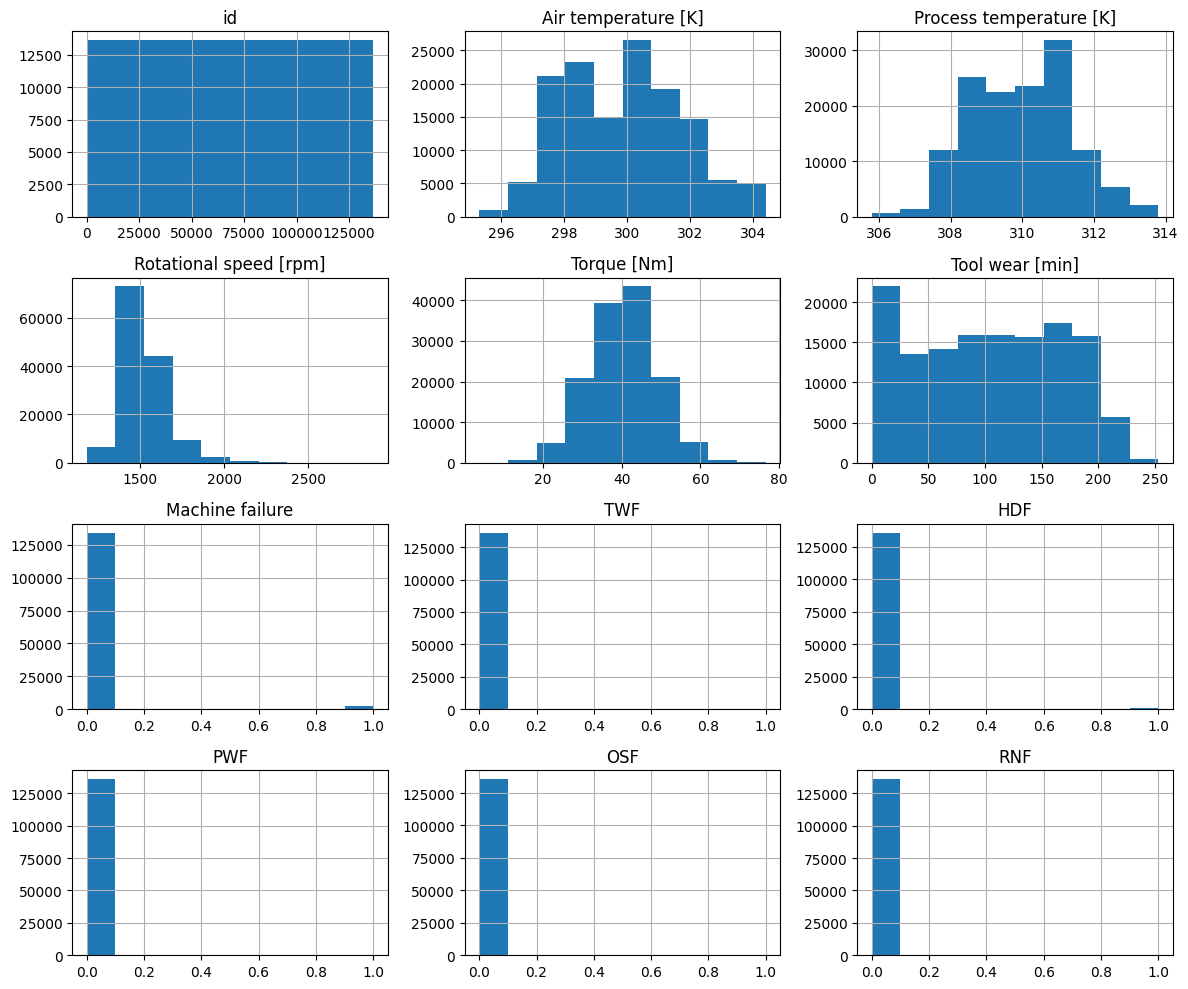

In [7]:
#Plotting histograms of numerical features
data = train_data
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

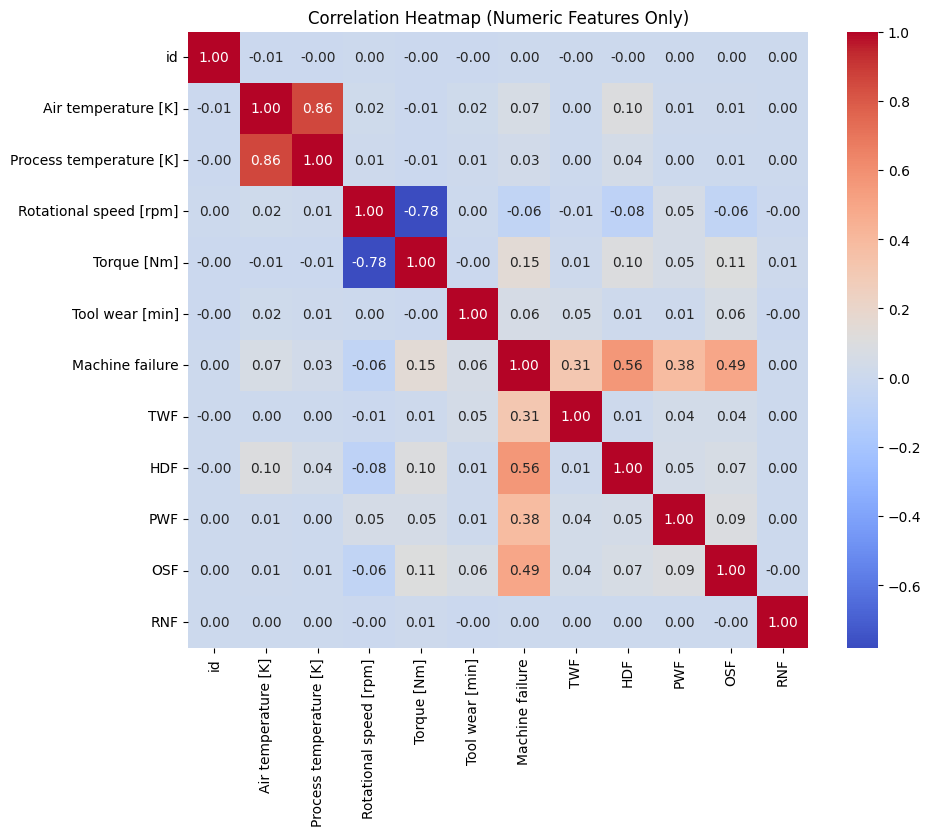

In [8]:
# Plotting correlation heatmap
# Select only numeric columns for correlation
numeric_data = train_data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

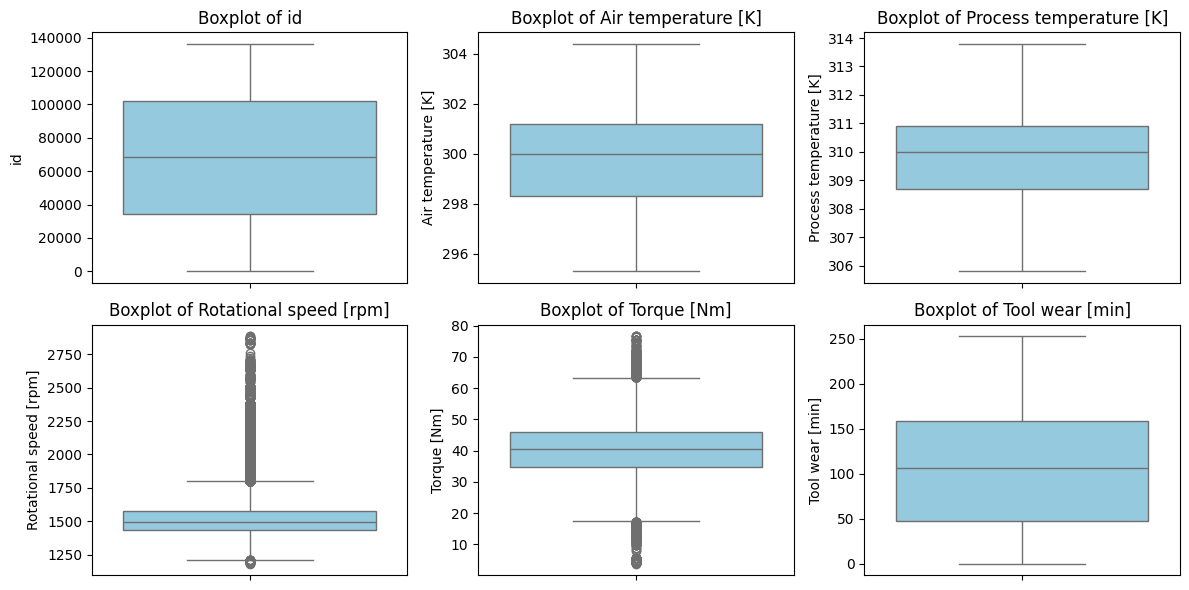

In [12]:
# Select only numeric columns for boxplots
numeric_features = train_data.select_dtypes(include=[np.number]).columns

# Plot boxplots for numerical features
plt.figure(figsize=(12, 6))

# Loop through numeric features and plot boxplots
for i, col in enumerate(numeric_features[:6]):  # Limiting to 6 plots per figure for clarity
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=train_data[col], color="skyblue")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


In [13]:
# If there are categorical variables, encode them using Label Encoding or One-Hot Encoding
# Example of Label Encoding for the 'Type' column
encoder = LabelEncoder()
data['Type'] = encoder.fit_transform(data['Type'])

# If there are other categorical features, you can use One-Hot Encoding as well
# data = pd.get_dummies(data, drop_first=True)


In [14]:
#Outlier removal using the IQR method
def remove_outliers_iqr(df, columns):
    """Removes outliers using the IQR method."""
    cleaned_df = df.copy()
    for col in columns:
        Q1 = cleaned_df[col].quantile(0.25)
        Q3 = cleaned_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]
    return cleaned_df

In [16]:
# Apply outlier removal
num_columns = ["Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"]
train_data_cleaned = remove_outliers_iqr(train_data, num_columns)

In [18]:
#Compare dataset sizes before and after outlier removal
print(f"Original Train Data Size: {train_data.shape[0]}")
print(f"New Train Data Size After Outlier Removal: {train_data_cleaned.shape[0]}")
print(f"Total Outliers Removed: {train_data.shape[0] - train_data_cleaned.shape[0]}")


Original Train Data Size: 136429
New Train Data Size After Outlier Removal: 130618
Total Outliers Removed: 5811


In [21]:
#Save cleaned data
train_data_cleaned.to_csv("train_cleaned.csv", index=False)
print("\nCleaned dataset saved as 'train_cleaned.csv'.")


Cleaned dataset saved as 'train_cleaned.csv'.


In [23]:
X = train_data_cleaned.drop(columns=["Machine failure"])  # Drop target column
y = train_data_cleaned["Machine failure"]

In [24]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nTrain-Test Split Completed!")
print(f"Training Set: {X_train.shape[0]} samples")
print(f"Testing Set: {X_test.shape[0]} samples")


Train-Test Split Completed!
Training Set: 104494 samples
Testing Set: 26124 samples


In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

In [26]:
# Standardize the numerical features
# Select only numerical features for scaling
numerical_features = X_train.select_dtypes(include=['number']).columns

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])

In [28]:
#Initialize models
log_reg = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)

In [31]:
# Train models
log_reg.fit(X_train_scaled, y_train)

# Before fitting the Random Forest, drop the 'Product ID' column and one-hot encode 'Type'
X_train_rf = X_train.drop(columns=['Product ID'])
X_test_rf = X_test.drop(columns=['Product ID'])

# One-hot encode the 'Type' column
X_train_rf = pd.get_dummies(X_train_rf, columns=['Type'], drop_first=True)  # drop_first to avoid multicollinearity
X_test_rf = pd.get_dummies(X_test_rf, columns=['Type'], drop_first=True)    # Ensure same columns in test set

rf_clf.fit(X_train_rf, y_train)  # Random Forest does not need scaling

# Predictions (use the modified X_test for Random Forest)
y_pred_logreg = log_reg.predict(X_test_scaled)
y_pred_rf = rf_clf.predict(X_test_rf)

In [32]:
#Model Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n🔹 {model_name} Model Evaluation 🔹")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC-AUC Score: {roc_auc_score(y_true, y_pred):.4f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

In [33]:

# Evaluate both models
evaluate_model(y_test, y_pred_logreg, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")



🔹 Logistic Regression Model Evaluation 🔹
Accuracy: 0.9965
Precision: 0.9924
Recall: 0.7450
F1 Score: 0.8511
ROC-AUC Score: 0.8725

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     25775
           1       0.99      0.74      0.85       349

    accuracy                           1.00     26124
   macro avg       0.99      0.87      0.92     26124
weighted avg       1.00      1.00      1.00     26124


🔹 Random Forest Model Evaluation 🔹
Accuracy: 0.9965
Precision: 0.9962
Recall: 0.7421
F1 Score: 0.8506
ROC-AUC Score: 0.8710

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     25775
           1       1.00      0.74      0.85       349

    accuracy                           1.00     26124
   macro avg       1.00      0.87      0.92     26124
weighted avg       1.00      1.00      1.00     26124



In [37]:
import xgboost as xgb  # Import XGBoost
from sklearn.model_selection import GridSearchCV  # Import GridSearchCV


In [42]:
xgb_model = xgb.XGBClassifier()
print(xgb_model)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [45]:
X_train = X_train.drop(columns=["Product ID"])
X_test = X_test.drop(columns=["Product ID"])


In [46]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical columns to numeric using Label Encoding
categorical_cols = X_train.select_dtypes(include=["object"]).columns

le = LabelEncoder()
for col in categorical_cols:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])


In [49]:
# Convert categorical columns to category dtype
categorical_cols = X_train.select_dtypes(include=["object"]).columns

for col in categorical_cols:
    X_train[col] = X_train[col].astype("category")
    X_test[col] = X_test[col].astype("category")


In [51]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)


In [52]:
X_train.columns = X_train.columns.str.replace(r'[^a-zA-Z0-9_]', '', regex=True)
X_test.columns = X_test.columns.str.replace(r'[^a-zA-Z0-9_]', '', regex=True)


In [53]:
grid_search_xgb.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:36:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [54]:
param_grid = {
    'max_depth': [10, 20, None],  # Keep max_depth
    'n_estimators': [50, 100, 150],  # Keep n_estimators
    # Remove min_samples_split since it's not valid for XGBoost
}


In [55]:
print("Best Parameters:", grid_search_xgb.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


Accuracy: 99.65%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     25775
           1       0.99      0.74      0.85       349

    accuracy                           1.00     26124
   macro avg       0.99      0.87      0.92     26124
weighted avg       1.00      1.00      1.00     26124



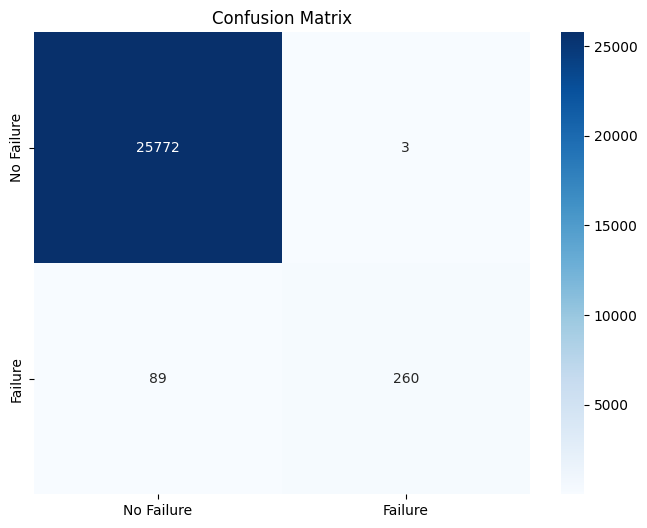

In [56]:
# Evaluate performance on the test set
best_model = grid_search_xgb.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report for detailed metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.title('Confusion Matrix')
plt.show()


In [57]:
# Print the best score from grid search
print("Best Score:", grid_search_xgb.best_score_)

# Get all results from the grid search
results = grid_search_xgb.cv_results_

# You can print or analyze the results in detail
print(pd.DataFrame(results))


Best Score: 0.9965739699983462
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        1.106051      0.122718         0.219452        0.045384   
1        2.099897      0.163282         0.399951        0.087405   
2        2.528091      0.725607         0.372393        0.002482   
3        0.735629      0.015653         0.139166        0.003128   
4        1.286776      0.009638         0.253766        0.004440   
5        1.805513      0.033558         0.370843        0.001700   
6        0.772557      0.045744         0.160906        0.020647   
7        1.972184      0.297488         0.331708        0.057302   
8        1.840972      0.041691         0.368259        0.002838   
9        0.966348      0.016221         0.214579        0.005564   
10       1.643548      0.039276         0.390530        0.009822   
11       2.875474      0.460135         0.731948        0.121395   
12       0.980290      0.028853         0.208516        0.005877   
13       1.631343

In [65]:
# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluate Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))

# Random Forest Classifier Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Logistic Regression Accuracy: 0.9965166130760986
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25775
           1       0.99      0.74      0.85       349

    accuracy                           1.00     26124
   macro avg       0.99      0.87      0.92     26124
weighted avg       1.00      1.00      1.00     26124

Confusion Matrix:
 [[25773     2]
 [   89   260]]
Random Forest Accuracy: 0.9965548920532843
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25775
           1       1.00      0.74      0.85       349

    accuracy                           1.00     26124
   macro avg       1.00      0.87      0.93     26124
weighted avg       1.00      1.00      1.00     26124

Confusion Matrix:
 [[25774     1]
 [   89   260]]


In [67]:
# Summarize the results
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Random Forest Best Model Accuracy:", accuracy_score(y_test, y_pred_rf))

# Conclusion: Choose the best model and discuss the next steps for deployment.


Logistic Regression Accuracy: 0.9965166130760986
Random Forest Best Model Accuracy: 0.9965548920532843


In [68]:
# Function to train and evaluate a model
def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    """
    Trains the provided model and evaluates it on the test set.
    Args:
    - model: The model to train and evaluate
    - X_train, X_test: Training and test feature sets
    - y_train, y_test: Training and test labels
    """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model.__class__.__name__} Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [71]:
train_evaluate_model(log_reg, X_train_scaled, X_test_scaled, y_train, y_test)
train_evaluate_model(rf_model, X_train, X_test, y_train, y_test)


LogisticRegression Accuracy: 0.9965166130760986
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25775
           1       0.99      0.74      0.85       349

    accuracy                           1.00     26124
   macro avg       0.99      0.87      0.92     26124
weighted avg       1.00      1.00      1.00     26124

Confusion Matrix:
 [[25773     2]
 [   89   260]]
RandomForestClassifier Accuracy: 0.9965548920532843
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25775
           1       1.00      0.74      0.85       349

    accuracy                           1.00     26124
   macro avg       1.00      0.87      0.93     26124
weighted avg       1.00      1.00      1.00     26124

Confusion Matrix:
 [[25774     1]
 [   89   260]]


In [72]:
# XGBoost Model
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


XGBoost Accuracy: 0.9964783340989128
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25775
           1       0.99      0.74      0.85       349

    accuracy                           1.00     26124
   macro avg       0.99      0.87      0.92     26124
weighted avg       1.00      1.00      1.00     26124

Confusion Matrix:
 [[25772     3]
 [   89   260]]


In [76]:
# Evaluate all models
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Random Forest Best Model Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Best XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

# Conclusion: Choose the best model and discuss the next steps for deployment.


Logistic Regression Accuracy: 0.9965166130760986
Random Forest Best Model Accuracy: 0.9965548920532843
Best XGBoost Accuracy: 0.9964783340989128


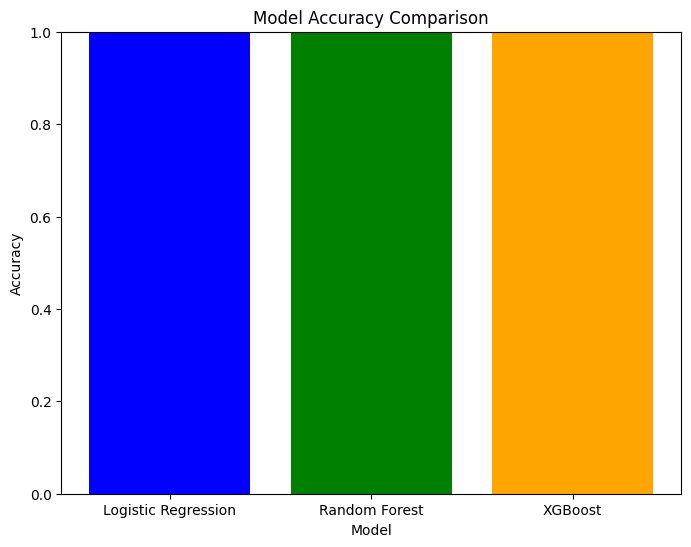

In [80]:
import matplotlib.pyplot as plt

# Accuracy scores for each model
accuracy_scores = {
    'Logistic Regression': accuracy_score(y_test, y_pred_log_reg),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'XGBoost': accuracy_score(y_test, y_pred_xgb)
}

# Plotting the accuracies
plt.figure(figsize=(8, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'orange'])

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Ensure the y-axis is between 0 and 1

# Display the plot
plt.show()
